In [144]:
"""
Created on: Thu. 13 Oct. 2022
Author: Mélina Verger

TO CHANGE. Compute the intersection area of kde estimates.
"""

# To load the trained models
import pickle

# For data manipulation
import pandas as pd
import numpy as np

# Plotting module
import seaborn as sns
import matplotlib.pyplot as plt


In [145]:
# I need the trained models and the different subset of predictions

## Loading

In [146]:
DATA = pickle.load(open("../data/DATA", "rb"))
SPLIT = pickle.load(open("../data/SPLIT", "rb"))

print(DATA)
print(SPLIT)

stInfo
7030


In [147]:
# Load test sets

X_test = pd.read_csv("../data/X_test" + "_" + DATA + "_" + SPLIT + ".csv")
y_test = pd.read_csv("../data/y_test" + "_" + DATA + "_" + SPLIT + ".csv")

In [148]:
# Load trained models

clf_lr = pickle.load(open("../models/" + DATA + "_" + SPLIT + "_clf_lr", "rb"))
clf_svc = pickle.load(open("../models/" + DATA + "_" + SPLIT + "_clf_svc", "rb"))
clf_knearest = pickle.load(open("../models/" + DATA + "_" + SPLIT + "_clf_knearest", "rb"))
clf_dt = pickle.load(open("../models/" + DATA + "_" + SPLIT + "_clf_dt", "rb"))
clf_rf = pickle.load(open("../models/" + DATA + "_" + SPLIT + "_clf_rf", "rb"))

## Separate data sets by (un-)protected groups

At that moment, I chose 'gender', 'imd_band' and 'disability' as interesting features to evaluate fairness with.

In [149]:
X_test_gender_1 = X_test[X_test["gender"] == 1]
X_test_gender_0 = X_test[X_test["gender"] == 0]

y_test_gender_1 = y_test.loc[X_test_gender_1.index]
y_test_gender_0 = y_test.loc[X_test_gender_0.index]

In [150]:
X_test_imdband_1 = X_test[X_test["imd_band"] == 1]
X_test_imdband_0 = X_test[X_test["imd_band"] == 0]

y_test_imdband_1 = y_test.loc[X_test_imdband_1.index]
y_test_imdband_0 = y_test.loc[X_test_imdband_0.index]

In [151]:
X_test_disability_1 = X_test[X_test["disability"] == 1]
X_test_disability_0 = X_test[X_test["disability"] == 0]

y_test_disability_1 = y_test.loc[X_test_disability_1.index]
y_test_disability_0 = y_test.loc[X_test_disability_0.index]

## Plotting

In [152]:
models = [clf_lr, clf_knearest, clf_dt, clf_rf]

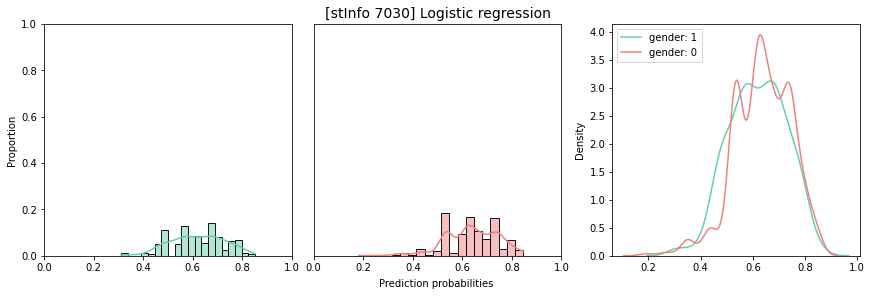

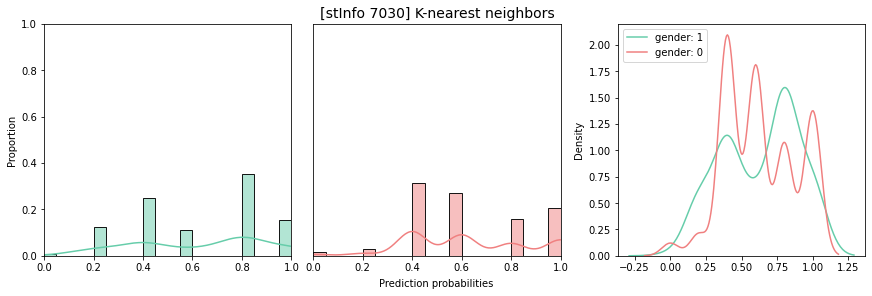

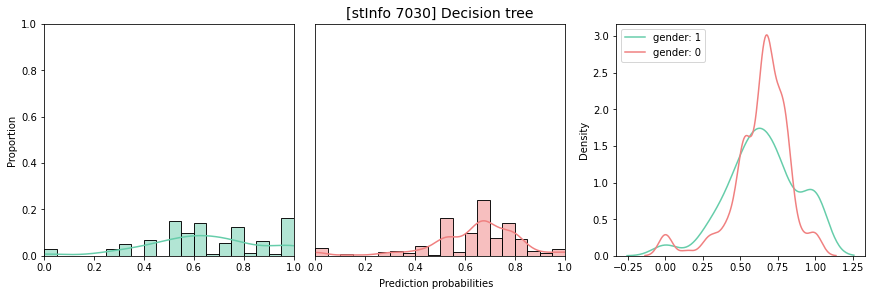

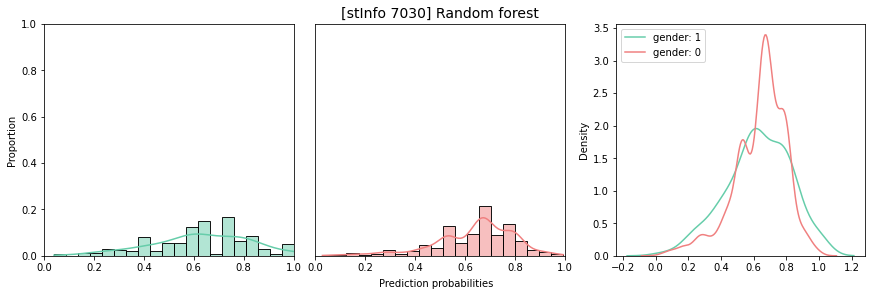

In [153]:
# Gender

for model in models:

    if model == clf_lr:
        model_name = "Logistic regression"
    elif model == clf_knearest:
        model_name = "K-nearest neighbors"
    elif model == clf_dt:
        model_name = "Decision tree"
    else:
        model_name = "Random forest"
    
    fig, axes = plt.subplots(1, 3, figsize=(12, 4), constrained_layout=True)
    fig.supxlabel("Prediction probabilities", fontsize=10)
    ax0 = sns.histplot(ax=axes[0], data=model.predict_proba(X_test_gender_1)[:, 1], kde=True, stat="proportion", color="mediumaquamarine", bins=20)
    ax0.set_ylim(0, 1)
    ax0.set_xlim(0, 1)
    ax1 = sns.histplot(ax=axes[1], data=model.predict_proba(X_test_gender_0)[:, 1], kde=True, stat="proportion", color="lightcoral", bins=20)
    ax1.set_ylim(0, 1)
    ax1.set_xlim(0, 1)
    ax1.set_yticklabels([]) # turn off y ticks labels
    ax1.yaxis.set_visible(False)
    ax2 = sns.kdeplot(ax=axes[2], data=model.predict_proba(X_test_gender_1)[:, 1], color="mediumaquamarine", label="gender: 1")
    ax2 = sns.kdeplot(ax=axes[2], data=model.predict_proba(X_test_gender_0)[:, 1], color="lightcoral", label="gender: 0")
    plt.legend(loc="upper left")
    ax1.set_title(f"[{DATA} {SPLIT}] {model_name}", loc="center", fontsize=14)
    

## Euclidian distance

In [154]:
def euclidian_distance(vector1, vector2):
    x1 = vector1[:,0]
    y1 = vector1[:,1]

    x2 = vector2[:,0]
    y2 = vector2[:,1]

    dist_vect = np.sum((x2 - x1)**2 + (y2 - y1)**2)

    return np.sqrt(dist_vect)

----------
similaritymeasures:
0.73
0.62
0.45
min and max:
0.85
0.72
22.91
----------
similaritymeasures:
0.78
0.61
0.36
min and max:
0.8
0.62
12.15
----------
similaritymeasures:
0.79
0.63
0.32
min and max:
0.78
0.62
12.46
----------
similaritymeasures:
0.82
0.69
0.27
min and max:
0.82
0.69
11.16


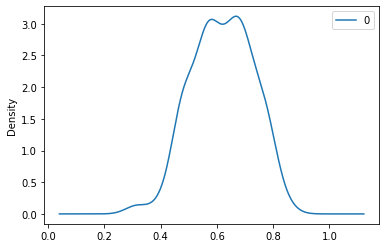

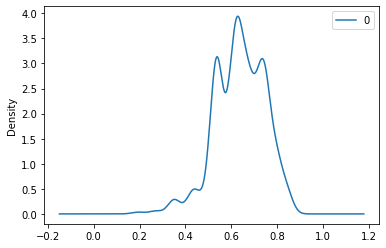

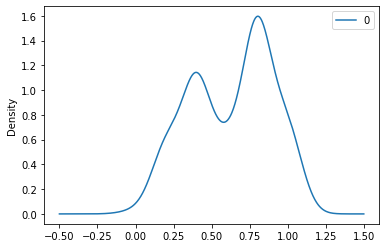

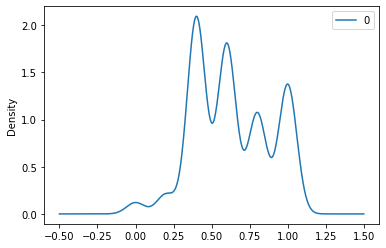

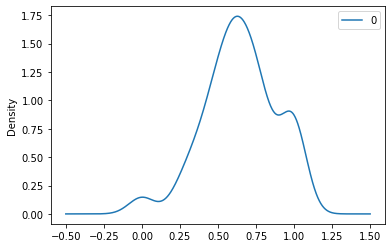

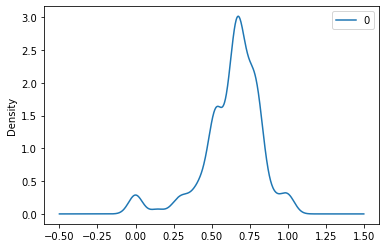

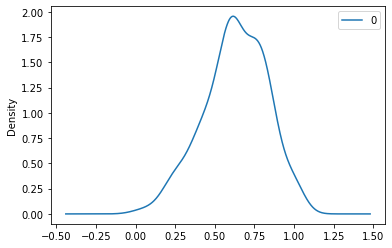

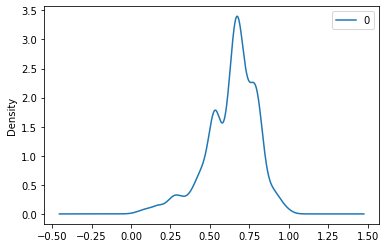

In [175]:
for model in models:

   print("----------", flush=True)
   # retrive curve objects
   line1 = pd.DataFrame(model.predict_proba(X_test_gender_1)[:, 1]).plot.kde()
   line2 = pd.DataFrame(model.predict_proba(X_test_gender_0)[:, 1]).plot.kde()

   # retrieve coordinates
   coordinates1 = line1.get_children()[0].get_path().vertices
   coordinates2 = line2.get_children()[0].get_path().vertices

   # area between curve 1 and curve 2 via their coordinates
   area = similaritymeasures.area_between_two_curves(coordinates1, coordinates2)

   # area of the union of the 2 curves (max. pt1 and pt2)
   coord_max = np.maximum(coordinates1, coordinates2) # element-wise
   xaxis = np.zeros((len(coord_max), 2))
   xaxis[:, 0] = np.linspace(0, 1, num=len(coord_max), endpoint=True)

   area_union = similaritymeasures.area_between_two_curves(coord_max, xaxis)

   print("similaritymeasures:", flush=True)
   print(round(area_union - area, 2), flush=True) # intersection area

   print(round((area_union - area)/area_union, 2), flush=True) # intersection area over union

   normalized_coordinates1 = coordinates1/np.linalg.norm(coordinates1)
   normalized_coordinates2 = coordinates2/np.linalg.norm(coordinates2)
   print(round(euclidian_distance(normalized_coordinates1, normalized_coordinates2), 2))
   


   print("min and max:", flush=True)
   intersection_curve = np.minimum(coordinates1, coordinates2)
   intersection_area = similaritymeasures.area_between_two_curves(intersection_curve, xaxis)
   print(round(intersection_area, 2), flush=True) # intersection area
   print(round(intersection_area/area_union, 2), flush=True) # ratio
   print(round(np.linalg.norm(coordinates2 - coordinates1), 2)) # euclidian distance with primitive function, same results no matter the ordi of the substraction

## Intersection area

### Get coordinates

Text(0.5, 1.0, '[stInfo 7030] LR')

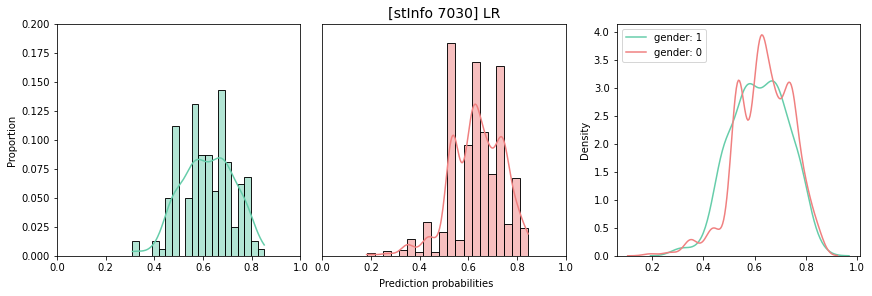

In [156]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4), constrained_layout=True)
fig.supxlabel("Prediction probabilities", fontsize=10)
ax0 = sns.histplot(ax=axes[0], data=clf_lr.predict_proba(X_test_gender_1)[:, 1], kde=True, stat="proportion", color="mediumaquamarine", bins=20)
ax0.set_ylim(0, 0.2)
ax0.set_xlim(0, 1)
ax1 = sns.histplot(ax=axes[1], data=clf_lr.predict_proba(X_test_gender_0)[:, 1], kde=True, stat="proportion", color="lightcoral", bins=20)
ax1.set_ylim(0, 0.2)
ax1.set_xlim(0, 1)
ax1.set_yticklabels([]) # turn off y ticks labels
ax1.yaxis.set_visible(False)
ax2 = sns.kdeplot(ax=axes[2], data=clf_lr.predict_proba(X_test_gender_1)[:, 1], color="mediumaquamarine", label="gender: 1")
ax2 = sns.kdeplot(ax=axes[2], data=clf_lr.predict_proba(X_test_gender_0)[:, 1], color="lightcoral", label="gender: 0")
#ax2.yaxis.tick_right()
#ax2.yaxis.set_label_position("right")
plt.legend(loc="upper left")
ax1.set_title(f"[{DATA} {SPLIT}] LR", loc="center", fontsize=14)

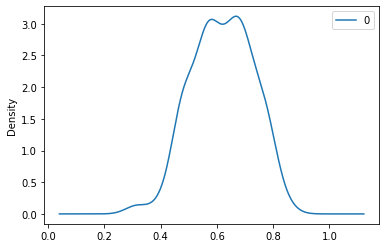

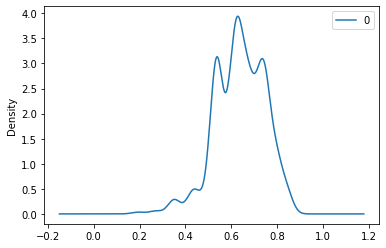

In [157]:
line1 = pd.DataFrame(clf_lr.predict_proba(X_test_gender_1)[:, 1]).plot.kde()
line2 = pd.DataFrame(clf_lr.predict_proba(X_test_gender_0)[:, 1]).plot.kde()

In [158]:
coordinates1 = line1.get_children()[0].get_path().vertices
coordinates2 = line2.get_children()[0].get_path().vertices

In [159]:
x1, y1 = np.split(coordinates1, 2, 1)
x2, y2 = np.split(coordinates2, 2, 1)

In [160]:
max(x1)

array([1.12242934])

In [161]:
max(y1)

array([3.11939898])

In [162]:
max(x2)

array([1.17767335])

In [163]:
max(y2)

array([3.94178247])

### Compute intersection area

In [164]:
import similaritymeasures

In [165]:
# quantify the difference between the two curves using
# area between two curves
area = similaritymeasures.area_between_two_curves(coordinates1, coordinates2)

In [166]:
print(area)
print(round(area*100, 2))

0.43943849369611965
43.94
